<a href="https://colab.research.google.com/github/ShrishteeSingh/Shri/blob/master/Redwine_clustering__(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist
%matplotlib inline


In [0]:
# reading the CSV file into pandas dataframe
from google.colab import files
uploaded = files.upload()
import io
data = pd.read_csv(io.BytesIO(uploaded['redwines.csv'])) 
data.head()

Saving redwines.csv to redwines (1).csv


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.5,0.90,0.00,1.6,0.052,9.0,17.0,0.99467,3.50,0.63,10.9,6
1,9.1,0.22,0.24,2.1,0.078,1.0,28.0,0.99900,3.41,0.87,10.3,6
2,6.9,0.52,0.25,2.6,0.081,10.0,37.0,0.99685,3.46,0.50,11.0,5
3,7.3,0.59,0.26,2.0,0.080,17.0,104.0,0.99584,3.28,0.52,9.9,5
4,12.5,0.28,0.54,2.3,0.082,12.0,29.0,0.99970,3.11,1.36,9.8,7


In [0]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
X = pd.DataFrame(data_scaled, columns=data.columns)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.268956,0.037240,0.000000,0.066205,0.002152,0.372401,0.703423,0.041157,0.144822,0.026068,0.451019,0.248267
1,0.283848,0.006862,0.007486,0.065503,0.002433,0.031192,0.873379,0.031161,0.106365,0.027137,0.321279,0.187153
2,0.168196,0.012676,0.006094,0.063378,0.001974,0.243763,0.901923,0.024300,0.084342,0.012188,0.268139,0.121881
3,0.068679,0.005551,0.002446,0.018816,0.000753,0.159939,0.978447,0.009369,0.030859,0.004892,0.093141,0.047041
4,0.346092,0.007752,0.014951,0.063681,0.002270,0.332248,0.802934,0.027679,0.086108,0.037655,0.271336,0.193812


In [0]:
# Case 1: Ward Method
Z = linkage(X, 'ward')
c, coph_dists = cophenet(Z , pdist(X))
print("Ward",c)
# Case 2: Average Linkage
Z = linkage(X, 'average')
c, coph_dists = cophenet(Z , pdist(X))
print("Average", c)
# Case 3: Complete Linkage
Z = linkage(X, 'complete')
c, coph_dists = cophenet(Z , pdist(X))
print("Complete",c)

Ward 0.7204738931272533
Average 0.7384195347684663
Complete 0.6969263945852484


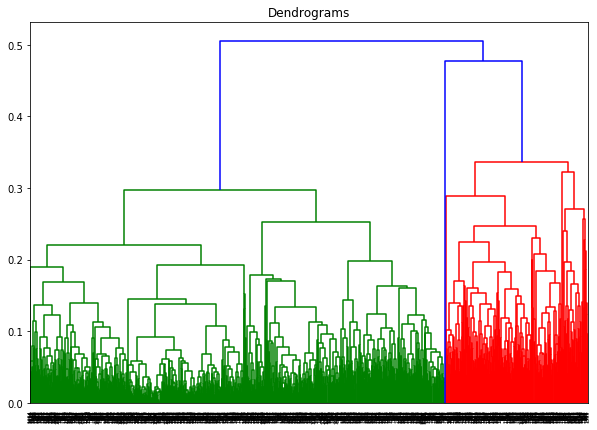

In [0]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='average'))

In [0]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')  
cluster.fit_predict(X)


array([0, 0, 1, ..., 0, 1, 0])

In [0]:
X['labels'] = cluster.labels_
X.groupby(["labels"]).count()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
labels,,,,,,,,,,,,
0,410,410,410,410,410,410,410,410,410,410,410,410
1,1189,1189,1189,1189,1189,1189,1189,1189,1189,1189,1189,1189


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
rating                  1599 non-null object
dtypes: float64(11), int64(1), object(1)
memory usage: 162.5+ KB


In [0]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [0]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [0]:
data['quality'].unique()

array([6, 5, 7, 3, 4, 8])

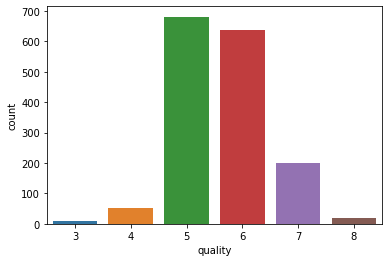

In [0]:
import seaborn as sns
sns.countplot(x='quality', data=data)

In [0]:
conditions = [
    (data['quality'] >= 7),
    (data['quality'] <= 4)
]
rating = ['Good', 'Bad']
data['rating'] = np.select(conditions, rating, default='Average')
data.rating.value_counts()

Average    1319
Good        217
Bad          63
Name: rating, dtype: int64

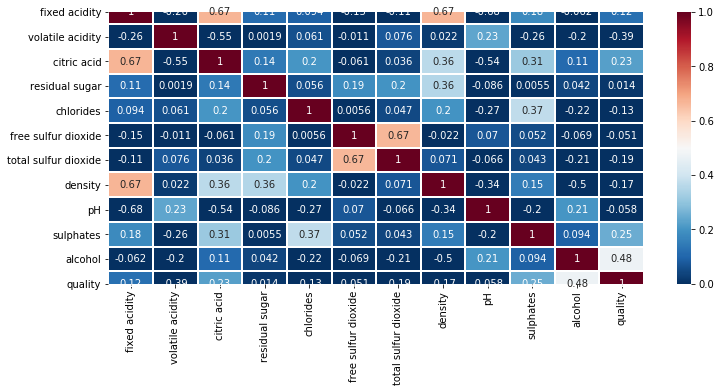

In [0]:
correlation = data.corr()
plt.figure(figsize=(12, 5))
sns.heatmap(correlation, annot=True, linewidths=1, vmin=0, cmap="RdBu_r")

In [0]:
correlation['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

[Text(0, 0.5, 'Alcohol Percent'),
 Text(0.5, 0, 'Ratings'),
 Text(0.5, 1.0, 'Alcohol percent in different ratings types')]

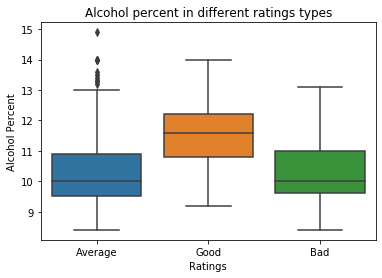

In [0]:
bx = sns.boxplot(x="rating", y='alcohol', data = data)
bx.set(xlabel='Ratings', ylabel='Alcohol Percent', title='Alcohol percent in different ratings types')

[Text(0, 0.5, 'Sulphates'),
 Text(0.5, 0, 'Wine Ratings'),
 Text(0.5, 1.0, 'Sulphates in different types of Wine ratings')]

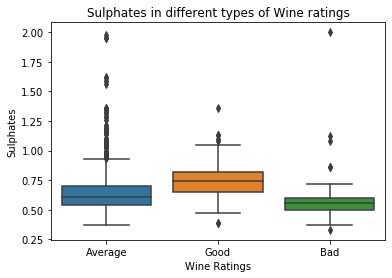

In [0]:
bx = sns.boxplot(x="rating", y='sulphates', data = data)
bx.set(xlabel='Wine Ratings', ylabel='Sulphates', title='Sulphates in different types of Wine ratings')

[Text(0, 0.5, 'citric acid'),
 Text(0.5, 0, 'Wine Ratings'),
 Text(0.5, 1.0, 'citric acid in different types of Wine ratings')]

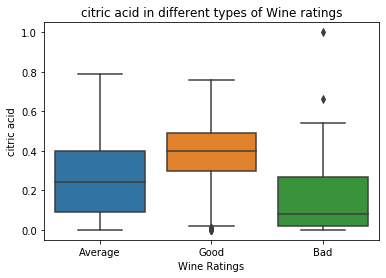

In [0]:
bx = sns.boxplot(x="rating", y='citric acid', data = data)
bx.set(xlabel='Wine Ratings', ylabel='citric acid', title='citric acid in different types of Wine ratings')

[Text(0, 0.5, 'fixed acidity'),
 Text(0.5, 0, 'Wine Ratings'),
 Text(0.5, 1.0, 'fixed acidity acid in different types of Wine ratings')]

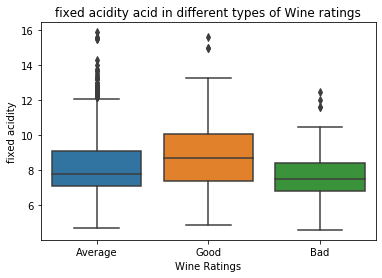

In [0]:
bx = sns.boxplot(x="rating", y='fixed acidity', data = data)
bx.set(xlabel='Wine Ratings', ylabel='fixed acidity', title='fixed acidity acid in different types of Wine ratings')

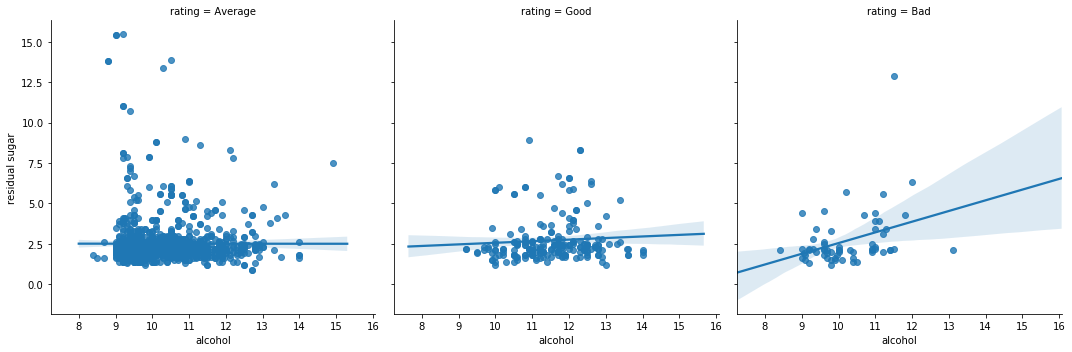

In [0]:
sns.lmplot(x = "alcohol", y = "residual sugar", col = "rating", data = data)

In [0]:
import seaborn as sns
import statsmodels.api as sm
from patsy import dmatrices
from sklearn import linear_model
y,X = dmatrices('quality ~ alcohol', data=data , return_type='dataframe')
print("X:", type(X))
print(X.columns)
model=sm.OLS(y, X)
result=model.fit()
result.summary()

X: <class 'pandas.core.frame.DataFrame'>
Index(['Intercept', 'alcohol'], dtype='object')


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     468.3
Date:                Wed, 04 Dec 2019   Prob (F-statistic):           2.83e-91
Time:                        12:58:05   Log-Likelihood:                -1721.1
No. Observations:                1599   AIC:                             3446.
Df Residuals:                    1597   BIC:                             3457.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8750      0.175     10.732      0.000       1.532       2.218
alcohol        0.3608      0.017     21.639      0.000       0.328       0.394
==============================================================================
Omnibus:                       38.501   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.758
Skew:                          -0.154   Prob(JB):                     2.62e-16
Kurtosis:                       3.991   Cond. No.                         104.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
model = sm.OLS.from_formula('quality ~ alcohol', data = data)
results = model.fit()
print(results.params)

Intercept    1.874975
alcohol      0.360842
dtype: float64
